<a href="https://colab.research.google.com/github/zahraa-m/PHE_UK/blob/Mizue/%5BUpdated_02_Jan%5D_PHE_Mizue_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Explore the factors for change in the cost of drugs between 2020 and 2021
*   Check the backgrounds in the three Primary Care Organisation (PCOs) 
*   Looking at the drug group by BNF_CHAPTER_PLUS_CODE
*   Focusing on the drug group 14


In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df_2020= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202004.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202104.csv')


## Backgroud infomation in the three forcused Primary Care Organisations(PCO) 
1) The number and top of Area code

In [37]:
#Background information 1)Check the number and top of Area code in 2020
df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2020['area_co'].describe()

count     215625
unique        21
top          M9 
freq       20797
Name: area_co, dtype: object

In [38]:
# Background information 1) Check the number and top of Area code in 2021
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]
df_2021['area_co'].describe()

count     221099
unique        24
top          M22
freq       21131
Name: area_co, dtype: object

2) Practices

In [39]:
#Background information 2)-1  Practices in 2020
df_2020['PRACTICE_NAME'].describe()

count                        216319
unique                          114
top       BENCHILL MEDICAL PRACTICE
freq                           3981
Name: PRACTICE_NAME, dtype: object

In [40]:
#Background information 2)-2 practices in 2021
df_2021['PRACTICE_NAME'].describe()

count                        221428
unique                          116
top       BENCHILL MEDICAL PRACTICE
freq                           4231
Name: PRACTICE_NAME, dtype: object

3) CHEMICAL_SUBSTANCE_BNF_DESCR

In [41]:
#Background information 3)-1 CHEMICAL_SUBSTANCE_BNF_DESCR in 2020
df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             216319
unique              1042
top       Colecalciferol
freq                3598
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

In [42]:
#Background information 3)-2 CHEMICAL_SUBSTANCE_BNF_DESCR in 2021
df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             221428
unique              1031
top       Colecalciferol
freq                3970
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

4) BNF_DESCRIPTION

In [43]:
#Background information 4)-1 BNF_DESCRIPTION in 2020
df_2020['BNF_DESCRIPTION'].describe()

count                        216319
unique                         7625
top       Paracetamol 500mg tablets
freq                           1105
Name: BNF_DESCRIPTION, dtype: object

In [44]:
#Background information 4)-2 BNF_DESCRIPTION in 2021
df_2021['BNF_DESCRIPTION'].describe()

count                        221428
unique                         7576
top       Paracetamol 500mg tablets
freq                           1063
Name: BNF_DESCRIPTION, dtype: object

5) ACTUAL_COST

In [45]:
#Background information 5)-1 ACTUAL_COST in 2020, 2021
frames = [df_2020, df_2021]
df_marge = pd.concat(frames) # marge into a dataframe of 2020 and 2021

table = pd.pivot_table(df_marge, 
                       values =['ACTUAL_COST'], index = ['YEAR_MONTH'], 
                       aggfunc=np.sum)
table

,ACTUAL_COST
YEAR_MONTH,
202004,7.849553e+06
202104,8.129385e+06


In [46]:
#(1)): Percentage increment of ACTUAL_COST in total from 2020 to 2021

table1 = pd.pivot_table(df_2020, 
                       values = 'ACTUAL_COST', index = ['STP_NAME'], 
                       aggfunc=np.sum) #ACTUAL_COST in total(2020)

table2 = pd.pivot_table(df_2021, 
                       values = 'ACTUAL_COST', index = ['STP_NAME'], 
                       aggfunc=np.sum) #ACTUAL_COST in total(2021)

table3 =((table2['ACTUAL_COST']- table1['ACTUAL_COST'])/ table1['ACTUAL_COST'])*100
table3 

STP_NAME
GREATER MANCHESTER HSC PARTNERSHIP STP    3.564933
Name: ACTUAL_COST, dtype: float64

In [47]:
# Background information 5)-2(2):Increment(ratio) of 'ACTUAL_COST' from 2020 to 2021
df_2020['ACTUAL_COST'].sum()
df_2021['ACTUAL_COST'].sum()

df_2021['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()

1.035649332444932

In [48]:
#  Background information 6) pivot table of 'ACTUAL_COST' of drugs(CHEMICAL_SUBSTANCE_BNF_DESCR') purchased in each area code in 2021
pd.pivot_table(df_2020,index=['area_co','CHEMICAL_SUBSTANCE_BNF_DESCR'], values=['ACTUAL_COST']).sum(1)

area_co  CHEMICAL_SUBSTANCE_BNF_DESCR
M1       Acenocoumarol                   25.792800
         Aciclovir                       13.129020
         Aclidinium bromide              60.447600
         Acrivastine                     41.670050
         Adapalene                       38.211493
                                           ...    
M9       Zopiclone                        4.105761
         Zuclopenthixol hydrochloride    10.005403
WA1      Colecalciferol                   5.271580
         Dexamethasone                   14.725420
         Other Appliances                 0.821140
Length: 11876, dtype: float64

# Top 30 of prescribed drugs 

In [49]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2020
drug_count_2020 = df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2020.head(30)

Colecalciferol                                3598
Co-codamol (Codeine phosphate/paracetamol)    3383
Other Appliances                              3213
Emollients                                    3000
Enteral nutrition                             2957
Metformin hydrochloride                       2488
Wound Management & Other Dressings            2333
Paracetamol                                   2245
Pregabalin                                    2233
Gabapentin                                    2025
Quetiapine                                    2016
Eye Products                                  1979
Other emollient preparations                  1970
Hydrocortisone                                1936
Beclometasone dipropionate                    1884
Ramipril                                      1879
Glucose blood testing reagents                1871
Venlafaxine                                   1864
Morphine sulfate                              1809
Macrogol 3350                  

In [50]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2021
drug_count_2021 = df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2021.head(30)

Colecalciferol                                3970
Co-codamol (Codeine phosphate/paracetamol)    3568
Other Appliances                              3493
Emollients                                    3265
Enteral nutrition                             3018
Metformin hydrochloride                       2616
Pregabalin                                    2472
Wound Management & Other Dressings            2296
Quetiapine                                    2212
Eye Products                                  2171
Gabapentin                                    2132
Paracetamol                                   2096
Hydrocortisone                                2062
Other emollient preparations                  2015
Venlafaxine                                   1978
Glucose blood testing reagents                1936
Ramipril                                      1867
Macrogol 3350                                 1840
Levothyroxine sodium                          1781
Morphine sulfate               

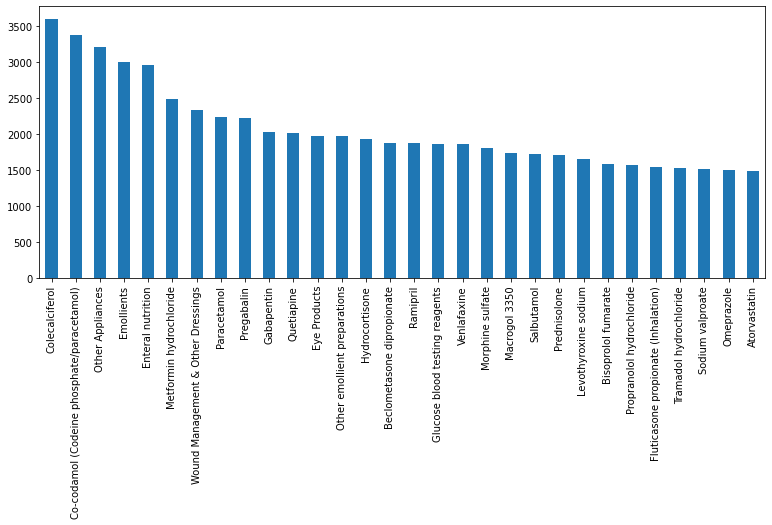

In [51]:
# Individual bar chart of prescribed_drug Top 30 in 2020
drug_2020_top30 = drug_count_2020.head(30)
drug_2020_top30.plot.bar(figsize=(13,5))

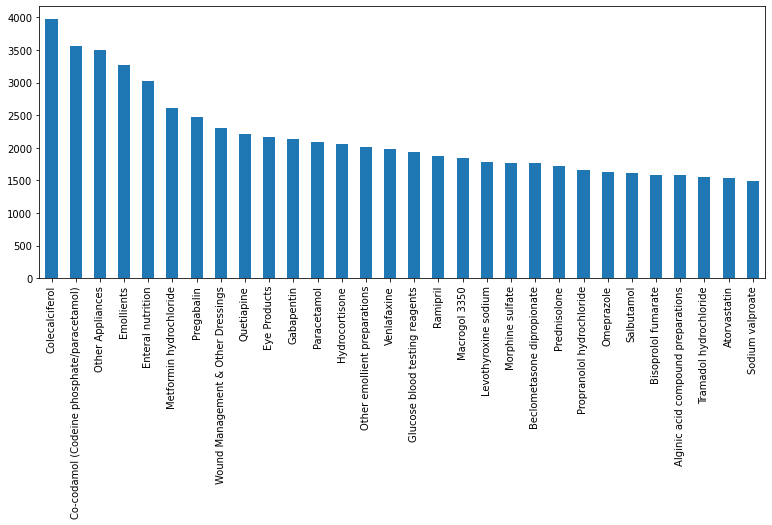

In [52]:
 # Individual bar chart of prescribed_drug Top 30 in 2021
drug_2021_top30 = drug_count_2021.head(30)
drug_2021_top30.plot.bar(figsize=(13,5))

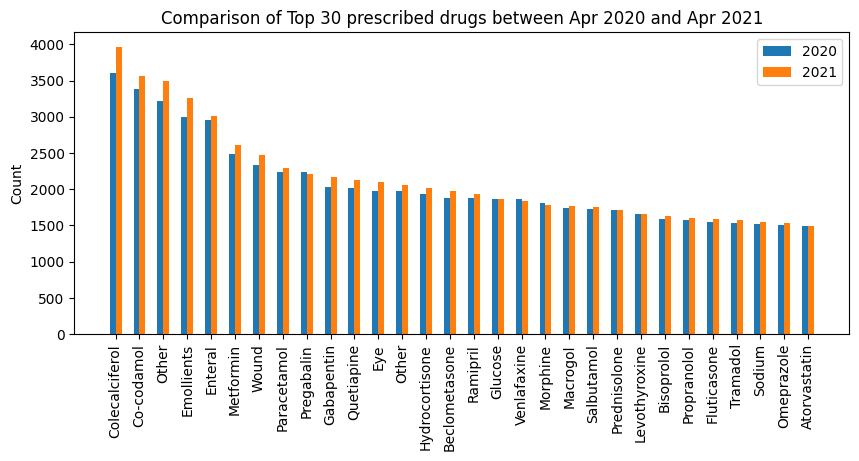

In [53]:
# Comparison bar chart of Top 30 prescribed drugs between Apr 2020 and Apr 2021
x = np.arange(len(drug_2020_top30.keys()))
width = 0.25

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_2020_top30, width, label='2020')
rects2 = ax.bar(x + width/2, drug_2021_top30, width, label='2021')

ax.set_ylabel('Count')
ax.set_title('Comparison of Top 30 prescribed drugs between Apr 2020 and Apr 2021')
ax.set_xticks(x)

first_word = pd.Series(drug_2020_top30.keys().tolist())
first = first_word.str.split(' ').str[0]

ax.set_xticklabels(first, rotation=90)

ax.legend()

fig = plt.gcf()
fig.set_size_inches(10,4, forward =True)
fig.set_dpi(100)

# The drugs grouped by 'BNF_CHAPTER_PLUS_CODE' 

In [54]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2020
df_2020['BNF_CHAPTER_PLUS_CODE'].describe()

count                         216319
unique                            20
top       04: Central Nervous System
freq                           54743
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [55]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2021
df_2021['BNF_CHAPTER_PLUS_CODE'].describe()

count                         221428
unique                            21
top       04: Central Nervous System
freq                           56409
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [56]:
# Not needed ??) count prescribed drugs by group( 'BNF_CHAPTER_PLUS_CODE' ) in 2020
drug_count_byGroup_2020 = df_2020[['BNF_CHAPTER_PLUS_CODE', 'QUANTITY']] .value_counts()
drug_count_byGroup_2020.describe()

count     2019.000000
mean       107.141654
std        510.512746
min          1.000000
25%          1.000000
50%          5.000000
75%         35.000000
max      10582.000000
dtype: float64

In [57]:
# sum(k GBP) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2020]; k=1000
df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                468.508071
02: Cardiovascular System                                   914.784524
03: Respiratory System                                      968.189143
04: Central Nervous System                                 1519.091111
05: Infections                                              181.082084
06: Endocrine System                                       1313.136027
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     194.625380
08: Malignant Disease and Immunosuppression                  94.722777
09: Nutrition and Blood                                     724.794658
10: Musculoskeletal and Joint Diseases                      137.940178
11: Eye                                                     116.891564
12: Ear, Nose and Oropharynx                                 80.768769
13: Skin                                                    305.498601
14: Immunological Products and Vaccines                

In [58]:
# sum(k GBP) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2021]
df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                544.279861
02: Cardiovascular System                                  1016.091803
03: Respiratory System                                      934.475671
04: Central Nervous System                                 1463.184325
05: Infections                                              173.144707
06: Endocrine System                                       1385.890353
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     199.773825
08: Malignant Disease and Immunosuppression                 100.457815
09: Nutrition and Blood                                     740.701600
10: Musculoskeletal and Joint Diseases                      144.268225
11: Eye                                                     112.416135
12: Ear, Nose and Oropharynx                                 80.327344
13: Skin                                                    335.465074
14: Immunological Products and Vaccines                

Text(0, 0.5, 'Percentage increase(%)')

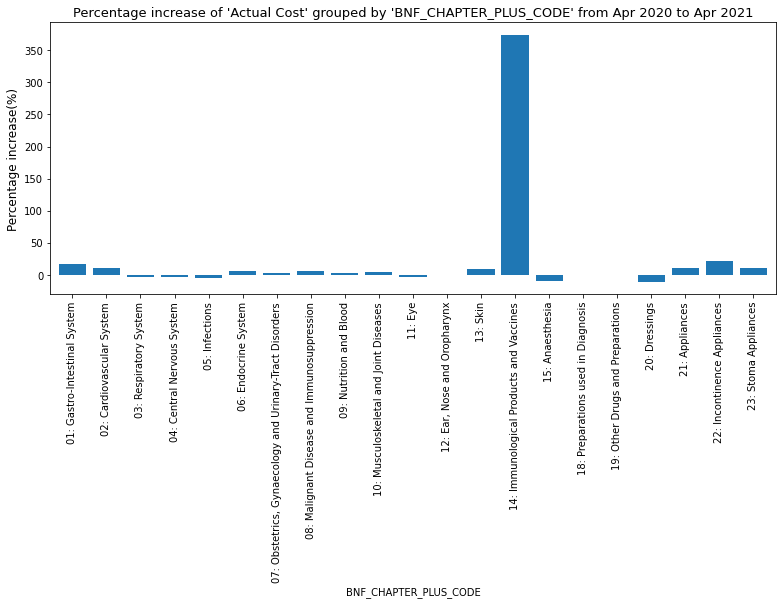

In [59]:
# Calculating percentage increase of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
AC_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()
AC_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()

percentage_increase =  (AC_sum_2021 - AC_sum_2020)/AC_sum_2020*100

ax=percentage_increase.plot.bar(figsize=(13,5), width=.8)
ax.set_title("Percentage increase of 'Actual Cost' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021", fontsize = 13)
ax.set_xlabel('BNF_CHAPTER_PLUS_CODE', fontsize = 10)
ax.set_ylabel('Percentage increase(%)', fontsize = 12)

Text(0, 0.5, 'Percentage increase(%)')

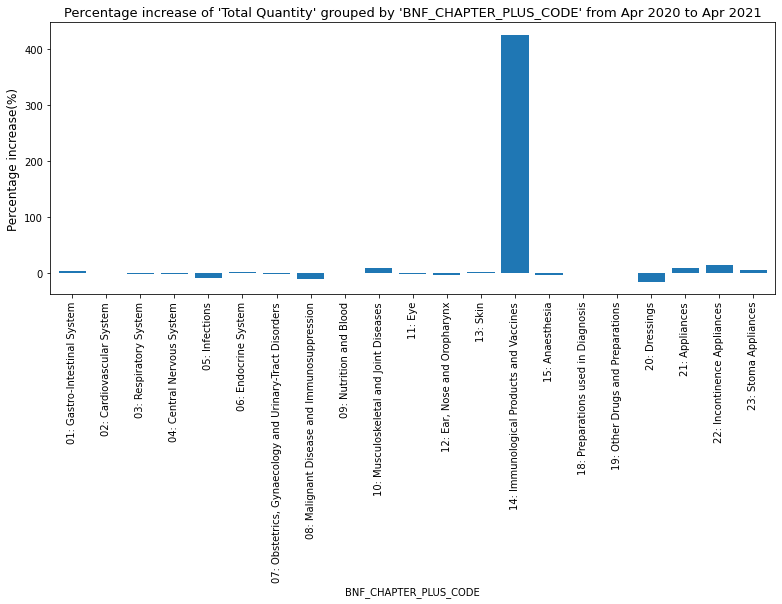

In [60]:
# Calculating percentage increase of 'TOTAL_QUANTITY' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
TQ_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()
TQ_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()

percentage_increase =  (TQ_sum_2021 - TQ_sum_2020)/TQ_sum_2020*100
percentage_increase.plot.bar(figsize=(13,5))

ax=percentage_increase.plot.bar(figsize=(13,5), width=.8)
ax.set_title("Percentage increase of 'Total Quantity' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021", fontsize = 13)
ax.set_xlabel('BNF_CHAPTER_PLUS_CODE', fontsize = 10)
ax.set_ylabel('Percentage increase(%)', fontsize = 12)

In [61]:
#proprtion(%) of ACT(kGBP) of the drugs in each group in 2020
prop_AC_sum_2020 = df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()*100
prop_AC_sum_2020 

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                5.968595
02: Cardiovascular System                                  11.653969
03: Respiratory System                                     12.334322
04: Central Nervous System                                 19.352581
05: Infections                                              2.306909
06: Endocrine System                                       16.728800
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.479445
08: Malignant Disease and Immunosuppression                 1.206728
09: Nutrition and Blood                                     9.233579
10: Musculoskeletal and Joint Diseases                      1.757300
11: Eye                                                     1.489149
12: Ear, Nose and Oropharynx                                1.028960
13: Skin                                                    3.891923
14: Immunological Products and Vaccines                     0.091072
15: Anaesthe

In [62]:
#proprtion(%) of ACT(kGBP) of the drugs in each group in 2021
#df_2021_sorted = df_2021.sort_values(by =['ACTUAL_COST'], ascending=False) 
#df_2021_sorted.head() 

prop_AC_sum_2021 = df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
prop_AC_sum_2021

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                6.695216
02: Cardiovascular System                                  12.499000
03: Respiratory System                                     11.495036
04: Central Nervous System                                 17.998710
05: Infections                                              2.129862
06: Endocrine System                                       17.047912
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.457429
08: Malignant Disease and Immunosuppression                 1.235737
09: Nutrition and Blood                                     9.111411
10: Musculoskeletal and Joint Diseases                      1.774651
11: Eye                                                     1.382837
12: Ear, Nose and Oropharynx                                0.988111
13: Skin                                                    4.126574
14: Immunological Products and Vaccines                     0.416944
15: Anaesthe

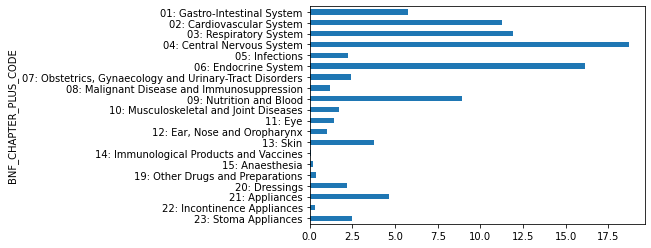

In [63]:
#Bar-chart of the proprtion(%) of ACT(kGBP) of the drugs in each group in 2020

prop_AC_sum_2020 = df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
df2020 = prop_AC_sum_2020.iloc[::-1]
prop_AC_sum_2020_barh = df2020.plot.barh(stacked=True);

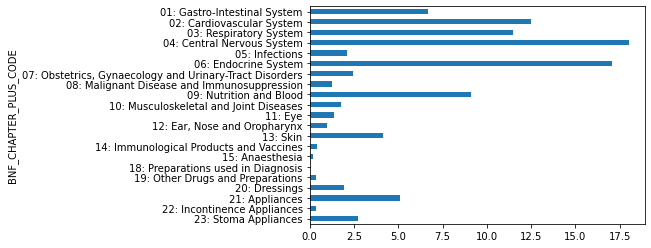

In [64]:
#Bar-chart of the proprtion(%) of ACT(kGBP) of the drugs in each group in 2021

prop_AC_sum_2021 = df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
df2021 = prop_AC_sum_2021.iloc[::-1]
prop_AC_sum_2021_barh = df2021.plot.barh(stacked=True);

# Close-up the TOTALQUANTITY and ACTUALCOST in 14: Immunological Products and Vaccines

In [65]:
#[2020] list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR'),'TOTAL_QUANTITY' and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" in 2020
drugs_14_2020 = df_2020.loc[df_2020['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2020 = drugs_14_2020[['CHEMICAL_SUBSTANCE_BNF_DESCR','TOTAL_QUANTITY', 'ACTUAL_COST']]

drugs_14_AC_2020_sum = drugs_14_AC_2020.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2020_sum

,TOTAL_QUANTITY,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,,
Diphtheria,34.0,260.43781
Hepatitis A,67.0,1258.05847
Hepatitis A/hepatitis B,2.0,38.65200
Hepatitis A/typhoid vaccine,25.0,831.04589
Hepatitis B,57.0,684.06972
Influenza,210.0,1698.85673
"Measles, mumps and rubella vaccine",1.0,7.12680
Meningococcal A + C + W135 + Y vaccine,1.0,27.88745
Pneumococcal,195.0,1657.93970


In [66]:
#  [2021]list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR'),'TOTAL_QUANTITY' and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" in 2020
drugs_14_2021 = df_2021.loc[df_2021['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2021 = drugs_14_2021[['CHEMICAL_SUBSTANCE_BNF_DESCR','TOTAL_QUANTITY', 'ACTUAL_COST']]

drugs_14_AC_2021_sum = drugs_14_AC_2021.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2021_sum

,TOTAL_QUANTITY,ACTUAL_COST
CHEMICAL_SUBSTANCE_BNF_DESCR,,
Diphtheria,15.0,108.98827
Hepatitis A,16.0,312.55575
Hepatitis A/hepatitis B,7.0,217.19723
Hepatitis A/typhoid vaccine,2.0,66.61497
Hepatitis B,121.0,1397.28130
"Human papillomavirus (Type 6,11,16,18)",11.0,886.24367
Influenza,3090.0,27897.14378
Meningococcal A + C + W135 + Y vaccine,4.0,111.77009
Pneumococcal,181.0,2405.75182
